✅ Dataset saved as 'maharashtra_crop_selling_price_dataset.csv'

--- Dataset Info ---
Dataset shape: (4000, 10)

Missing values:
 District                     0
Soil_Type                    0
Irrigation_Type              0
Crop_Name                    0
Season                       0
Rainfall_mm                  0
Temperature_avg              0
Month                        0
Year                         0
Selling_Price_per_Quintal    0
dtype: int64

First 5 rows of the dataset:
      District Soil_Type Irrigation_Type Crop_Name  Season  Rainfall_mm  \
0    Kolhapur  Alluvial            Drip    Cotton  Summer       625.42   
1    Kolhapur     Black            Well   Soybean  Summer       776.69   
2    Amravati  Alluvial         Rainfed    Cotton  Kharif       800.11   
3        Pune       Red            Well    Cotton  Summer       850.51   
4  Aurangabad       Red            Drip      Rice  Summer       671.88   

   Temperature_avg  Month  Year  Selling_Price_per_Quintal  
0         

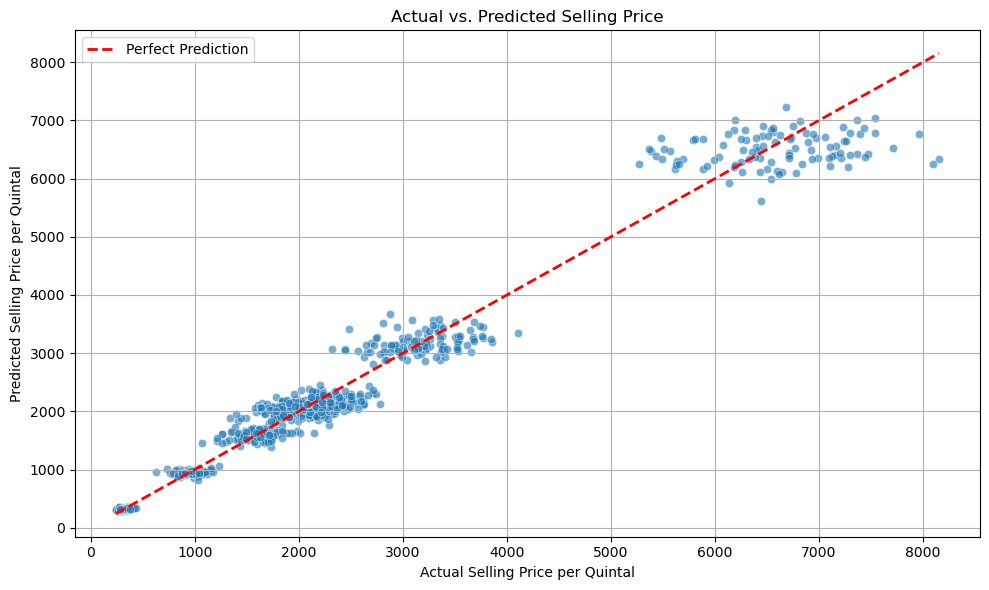

📊 'feature_importance.png' saved.


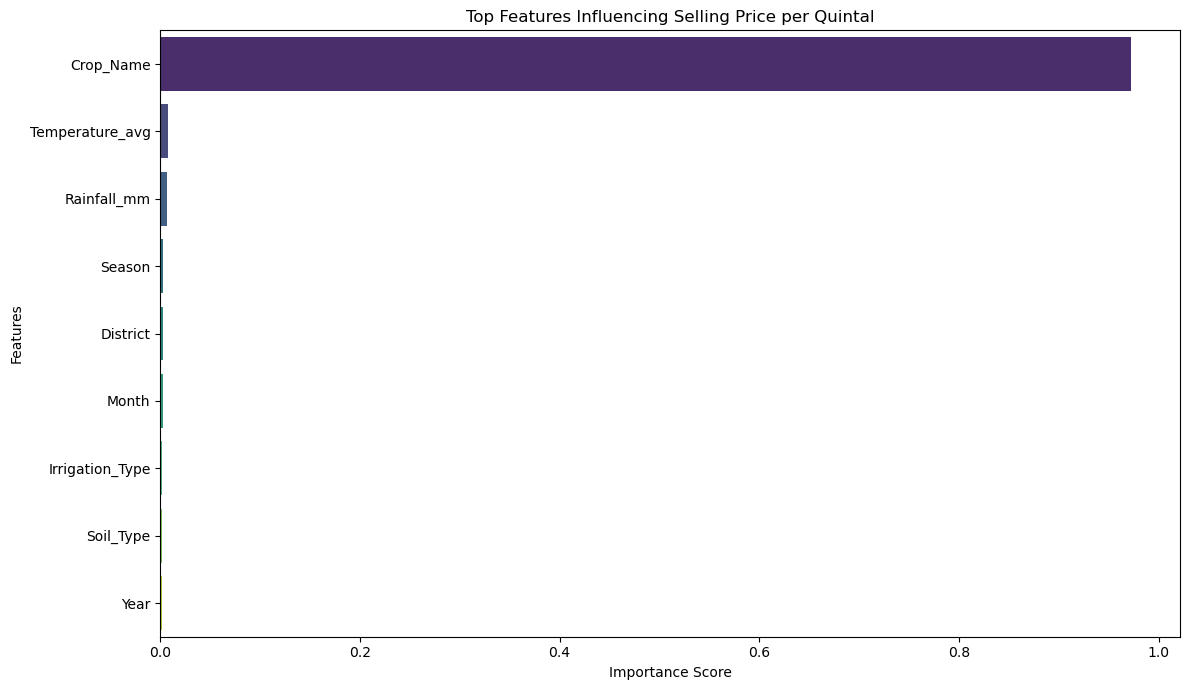


✅ Regression model and preprocessing objects saved successfully.


In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

districts = ["Pune", "Nashik", "Nagpur", "Kolhapur", "Aurangabad", "Amravati"]
soil_types = ["Black", "Red", "Laterite", "Alluvial"]
irrigation_types = ["Rainfed", "Canal", "Well", "Drip"]
crop_names = ["Wheat", "Rice", "Soybean", "Sugarcane", "Cotton", "Onion", "Tomato", "Bajra"]
seasons = ["Kharif", "Rabi", "Summer"]

def generate_price(crop, season):
    base_prices = {
        "Wheat": 2100, "Rice": 1900, "Soybean": 3000,
        "Sugarcane": 310, "Cotton": 6200, "Onion": 1500,
        "Tomato": 900, "Bajra": 2000
    }
    fluctuation = np.random.normal(0, 0.1)
    season_factor = {"Kharif": 1, "Rabi": 1.05, "Summer": 1.1}
    return round(base_prices[crop] * season_factor[season] * (1 + fluctuation), 2)

data = []
for _ in range(4000):
    crop = random.choice(crop_names)
    season = random.choice(seasons)
    # Assign month based on season
    if season == "Kharif":
        month = random.randint(6, 11)
    elif season == "Rabi":
        month = random.choice([12, 1, 2, 3])
    else: # Summer
        month = random.randint(4, 6)

    data.append({
        "District": random.choice(districts),
        "Soil_Type": random.choice(soil_types),
        "Irrigation_Type": random.choice(irrigation_types),
        "Crop_Name": crop,
        "Season": season,
        "Rainfall_mm": round(np.random.normal(700, 150), 2),
        "Temperature_avg": round(np.random.normal(26, 3), 2),
        "Month": month,
        "Year": random.choice([2021, 2022, 2023, 2024]),
        "Selling_Price_per_Quintal": generate_price(crop, season)
    })

df = pd.DataFrame(data)
df.to_csv("maharashtra_crop_selling_price_dataset.csv", index=False)
print("✅ Dataset saved as 'maharashtra_crop_selling_price_dataset.csv'")

df = pd.read_csv("maharashtra_crop_selling_price_dataset.csv")

print("\n--- Dataset Info ---")
print("Dataset shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nFirst 5 rows of the dataset:\n", df.head())

X = df.drop(columns=["Selling_Price_per_Quintal"])
y = df["Selling_Price_per_Quintal"]

label_encoders = {}
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le
print("\n--- Categorical Features Encoded ---")
print(X.head())


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\n--- Features Scaled ---")
print(X_scaled_df.head())

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
print(f"\n--- Data Split ---")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 uses all available cores
model.fit(X_train, y_train)
print("\n✅ Random Forest Regressor model trained successfully.")

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\n--- Model Evaluation (Regression) ---")
print(f"✅ Mean Squared Error (MSE): {mse:.4f}")
print(f"✅ Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"✅ R-squared (R2): {r2:.4f}")
print(f"✅ Mean Absolute Error (MAE): {mae:.4f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Selling Price per Quintal")
plt.ylabel("Predicted Selling Price per Quintal")
plt.title("Actual vs. Predicted Selling Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('actual_vs_predicted.png')
print("\n📈 'actual_vs_predicted.png' saved.")
plt.show() # Display the plot

importances = model.feature_importances_
feature_names = X.columns # Use original column names for plotting
sorted_indices = np.argsort(importances)[::-1] # Sort in descending order

plt.figure(figsize=(12, 7))
sns.barplot(x=importances[sorted_indices], y=feature_names[sorted_indices], orient='h', palette='viridis')
plt.title("Top Features Influencing Selling Price per Quintal")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig('feature_importance.png')
print("📊 'feature_importance.png' saved.")
plt.show() # Display the plot

joblib.dump(model, 'regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

print("\n✅ Regression model and preprocessing objects saved successfully.")

In [2]:
import pandas as pd
import joblib
import numpy as np

model = joblib.load("regression_model.pkl")
scaler = joblib.load("scaler.pkl")
label_encoders = joblib.load("label_encoders.pkl")

sample_input_for_selling_price_prediction = {
    'District': 'Pune',
    'Soil_Type': 'Black',
    'Irrigation_Type': 'Rainfed',
    'Crop_Name': 'Soybean',
    'Season': 'Kharif',
    'Rainfall_mm': 400,
    'Temperature_avg': 25,
    'Month': 7,
    'Year': 2025
}

full_farmer_input = {
    'District': 'Pune',
    'Farm_Size_Acre': 1,
    'Irrigation_Type': 'Rainfed',
    'Soil_Type': 'Black',
    'Crop_Name': 'Soybean',
    'Season': 'Kharif',
    'Seed_Cost': 600,
    'Fertilizer_Cost': 500,
    'Pesticide_Cost': 0,
    'Labor_Cost': 300,
    'Irrigation_Cost': 0,
    'Machinery_Cost': 500,
    'Yield_per_Acre': 6, # Assuming this is in quintals per acre
    'Rainfall_mm': 400,
    'Temperature_avg': 25,
    'Month':7,
    'Year': 2025
}

input_df_for_price = pd.DataFrame([sample_input_for_selling_price_prediction])

expected_regression_features = [
    'District', 'Soil_Type', 'Irrigation_Type', 'Crop_Name', 'Season',
    'Rainfall_mm', 'Temperature_avg', 'Month', 'Year'
]
input_df_for_price = input_df_for_price[expected_regression_features]

for col in input_df_for_price.select_dtypes(include='object').columns:
    if col in label_encoders:
        input_df_for_price[col] = label_encoders[col].transform(input_df_for_price[col])
    else:
        raise ValueError(f"Missing encoder for column: {col}. Or an unseen category was provided: {input_df_for_price[col].values[0]}")

input_scaled_for_price = scaler.transform(input_df_for_price)

predicted_selling_price_per_quintal = model.predict(input_scaled_for_price)[0]

# 💸 Step 5: Calculate Total Revenue, Total Cost, and Profit
yield_per_acre = full_farmer_input["Yield_per_Acre"]
farm_size_acre = full_farmer_input["Farm_Size_Acre"]

total_revenue = (
    yield_per_acre
    * farm_size_acre
    * predicted_selling_price_per_quintal
)

total_cost = (
    full_farmer_input["Seed_Cost"] +
    full_farmer_input["Fertilizer_Cost"] +
    full_farmer_input["Pesticide_Cost"] +
    full_farmer_input["Labor_Cost"] +
    full_farmer_input["Irrigation_Cost"] +
    full_farmer_input["Machinery_Cost"]
)

profit = total_revenue - total_cost

# 📢 Step 6: Determine and Output Result
profit_status = "Profitable" if profit > 0 else "Not Profitable"

print("\n--- Crop Profitability Prediction ---")
print(f"Based on input for {full_farmer_input['Crop_Name']} in {full_farmer_input['District']}:")
print(f"   ➤ Predicted Selling Price per Quintal : ₹{predicted_selling_price_per_quintal:.2f}")
print(f"   ➤ Total Expected Revenue              : ₹{total_revenue:.2f}")
print(f"   ➤ Total Estimated Cost                : ₹{total_cost:.2f}")
print(f"   ➤ Calculated Profit/Loss              : ₹{profit:.2f}")
print(f"   ➤ Profit Status                       : {profit_status}")


--- Crop Profitability Prediction ---
Based on input for Soybean in Pune:
   ➤ Predicted Selling Price per Quintal : ₹3150.69
   ➤ Total Expected Revenue              : ₹18904.12
   ➤ Total Estimated Cost                : ₹1900.00
   ➤ Calculated Profit/Loss              : ₹17004.12
   ➤ Profit Status                       : Profitable
